In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the data
df = pd.read_csv('../datasets/gpqa_diamond_compressed_2.csv')



# For each row, give the question, and then the number of words in each compression


df = df[['Question', 'Correct Answer', 'Subdomain', 'High-level domain', 'Record ID', 'Incorrect Answer 1', 'Incorrect Answer 2',
       'Incorrect Answer 3', 'original_word_count', 'compression_75', 'compression_75_word_count',
       'compression_75_target_words', 'compression_50',
       'compression_50_word_count', 'compression_50_target_words',
       'compression_25', 'compression_25_word_count',
       'compression_25_target_words']]


df.to_csv('../datasets/compressions.csv', index=False)

In [13]:
# Filter questions where one of the compression questions is na or empty or nan

print(df.shape)
df = df[(df['compression_75'].notna()) & (df['compression_75'].str.strip() != '') & (df['compression_75'].notna()) & (df['compression_75'].str.strip() != '')]
print(df.shape)

(198, 100)
(198, 100)


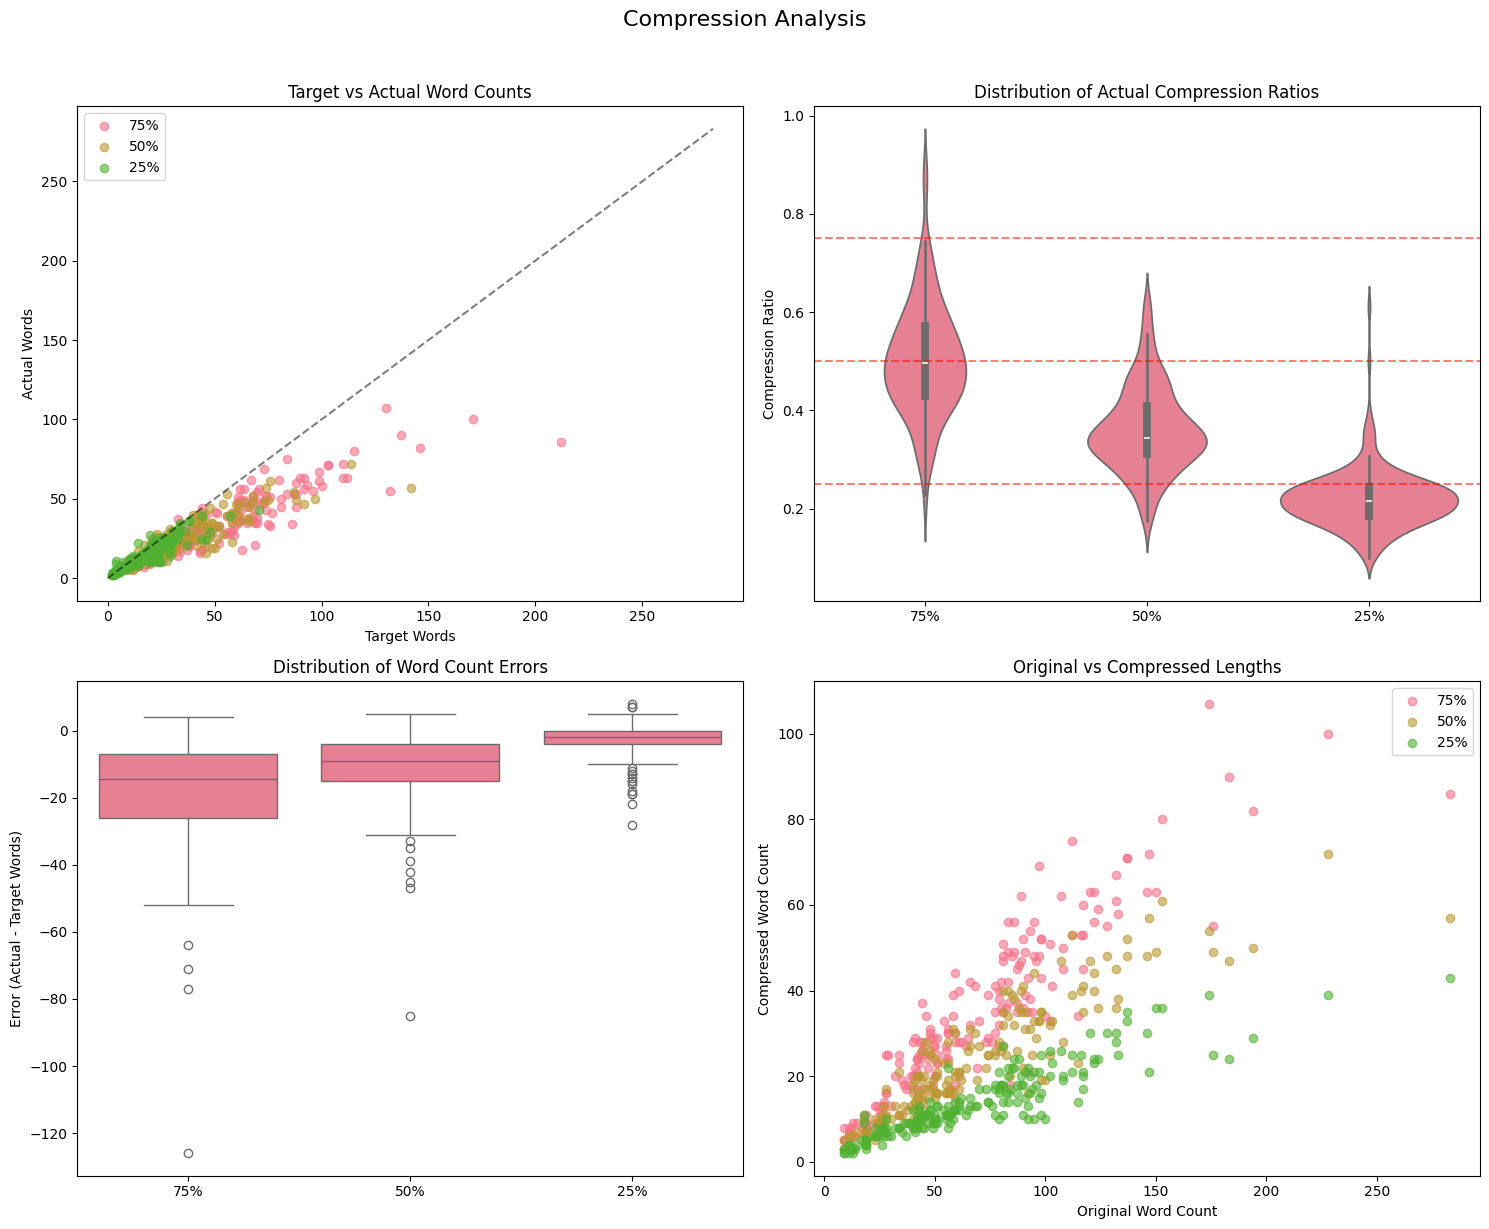


Compression Statistics:

75% Compression:
Mean actual ratio: 0.504
Target ratio: 0.750
Mean absolute error: 18.03 words
Exact matches: 1.5%

50% Compression:
Mean actual ratio: 0.362
Target ratio: 0.500
Mean absolute error: 11.07 words
Exact matches: 2.5%

25% Compression:
Mean actual ratio: 0.220
Target ratio: 0.250
Mean absolute error: 3.60 words
Exact matches: 16.2%

Example Compressions:

Question 1:
Original (45 words):
Two quantum states with energies E1 and E2 have a lifetime of 10^-9 sec and 10^-8 sec, respectively. We want to clearly distinguish these two energy levels. Which one of the following options could be their energy difference so that they can be clearly resolved?


75% (27/34 words):
Two quantum states with energies E1, E2, lifetimes 10^-9, 10^-8 seconds respectively. Want to distinguish energy levels. Which option could be their energy difference for clear resolution?

50% (20.0/22.0 words):
Quantum states with energies E1, E2, lifetimes 10^-9, 10^-8 seconds. Dist

In [16]:


# 1. Calculate actual compression ratios
for level in [75, 50, 25]:
    df[f'actual_ratio_{level}'] = df[f'compression_{level}_word_count'] / df['original_word_count']
    df[f'target_ratio_{level}'] = df[f'compression_{level}_target_words'] / df['original_word_count']
    df[f'ratio_error_{level}'] = df[f'actual_ratio_{level}'] - level/100

# 2. Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Compression Analysis', fontsize=16, y=1.02)

# Plot 1: Target vs Actual Word Counts
for i, level in enumerate([75, 50, 25]):
    ax = axes[0, 0]
    ax.scatter(df[f'compression_{level}_target_words'], 
              df[f'compression_{level}_word_count'], 
              alpha=0.6, 
              label=f'{level}%')
ax.plot([0, df['original_word_count'].max()], [0, df['original_word_count'].max()], 'k--', alpha=0.5)
ax.set_xlabel('Target Words')
ax.set_ylabel('Actual Words')
ax.set_title('Target vs Actual Word Counts')
ax.legend()

# Plot 2: Compression Ratio Distribution
ratios_data = []
labels = []
for level in [75, 50, 25]:
    ratios_data.extend(df[f'actual_ratio_{level}'])
    labels.extend([f'{level}%'] * len(df))

sns.violinplot(y=ratios_data, x=labels, ax=axes[0, 1])
axes[0, 1].axhline(y=0.75, color='r', linestyle='--', alpha=0.5)
axes[0, 1].axhline(y=0.50, color='r', linestyle='--', alpha=0.5)
axes[0, 1].axhline(y=0.25, color='r', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Distribution of Actual Compression Ratios')
axes[0, 1].set_ylabel('Compression Ratio')

# Plot 3: Word Count Error Distribution
error_data = []
error_labels = []
for level in [75, 50, 25]:
    error = df[f'compression_{level}_word_count'] - df[f'compression_{level}_target_words']
    error_data.extend(error)
    error_labels.extend([f'{level}%'] * len(df))

sns.boxplot(y=error_data, x=error_labels, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Word Count Errors')
axes[1, 0].set_ylabel('Error (Actual - Target Words)')

# Plot 4: Original vs Compressed Lengths
for i, level in enumerate([75, 50, 25]):
    ax = axes[1, 1]
    ax.scatter(df['original_word_count'], 
              df[f'compression_{level}_word_count'], 
              alpha=0.6, 
              label=f'{level}%')
ax.set_xlabel('Original Word Count')
ax.set_ylabel('Compressed Word Count')
ax.set_title('Original vs Compressed Lengths')
ax.legend()

plt.tight_layout()
plt.show()

# Print statistics
print("\nCompression Statistics:")
for level in [75, 50, 25]:
    print(f"\n{level}% Compression:")
    print(f"Mean actual ratio: {df[f'actual_ratio_{level}'].mean():.3f}")
    print(f"Target ratio: {level/100:.3f}")
    print(f"Mean absolute error: {abs(df[f'compression_{level}_word_count'] - df[f'compression_{level}_target_words']).mean():.2f} words")
    print(f"Exact matches: {(df[f'compression_{level}_word_count'] == df[f'compression_{level}_target_words']).mean()*100:.1f}%")
    
# Example compression analysis
print("\nExample Compressions:")
for idx in range(len(df)):
    print(f"\nQuestion {idx+1}:")
    print(f"Original ({df.iloc[idx]['original_word_count']} words):")
    print(df.iloc[idx]['Question'])
    for level in [75, 50, 25]:
        print(f"\n{level}% ({df.iloc[idx][f'compression_{level}_word_count']}/{df.iloc[idx][f'compression_{level}_target_words']} words):")
        print(df.iloc[idx][f'compression_{level}'])

0.8080808080808081

Overall Accuracies:
Original: 78.28%
75% Compression: 80.81%
50% Compression: 73.96%
25% Compression: 80.81%


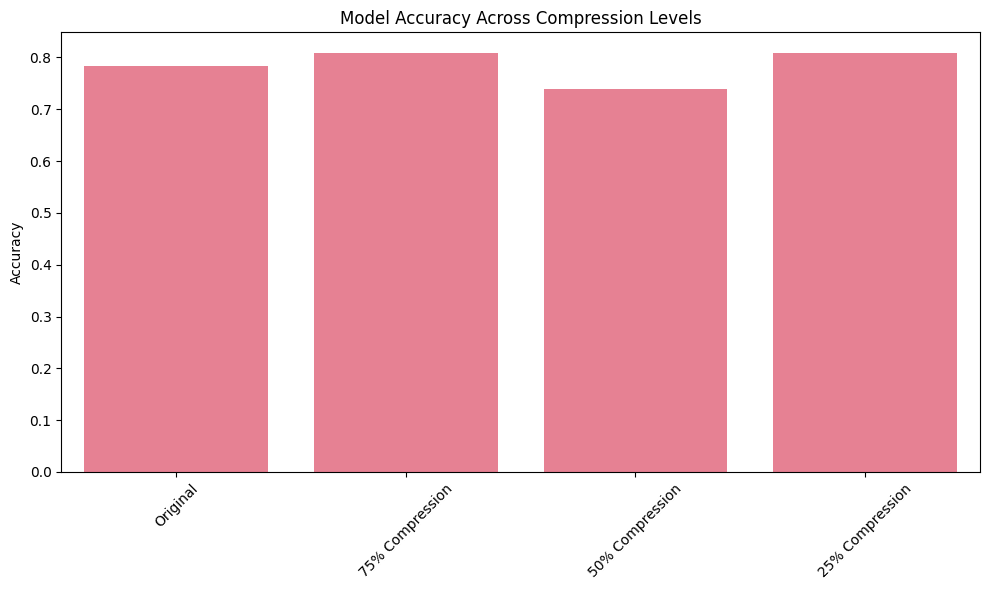

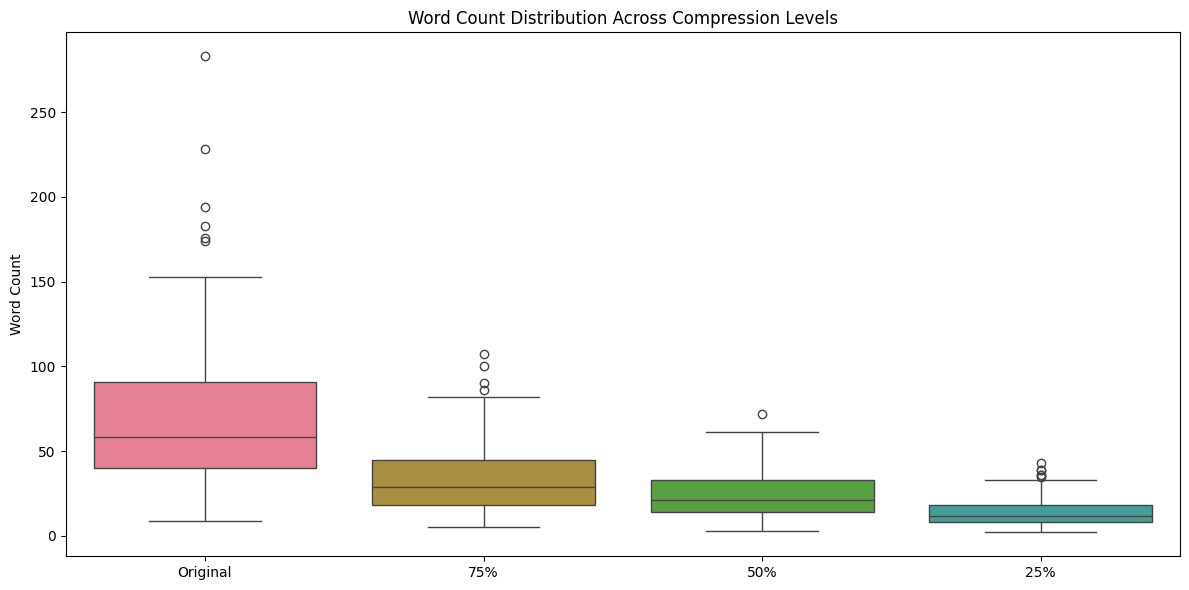

/var/folders/pn/ctr6tfqn77556nyp3p9v447r0000gn/T/ipykernel_32862/4049118297.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accuracy_by_bin = analysis_df.groupby(bins)[is_correct_col].mean()
/var/folders/pn/ctr6tfqn77556nyp3p9v447r0000gn/T/ipykernel_32862/4049118297.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accuracy_by_bin = analysis_df.groupby(bins)[is_correct_col].mean()


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1500x500 with 0 Axes>

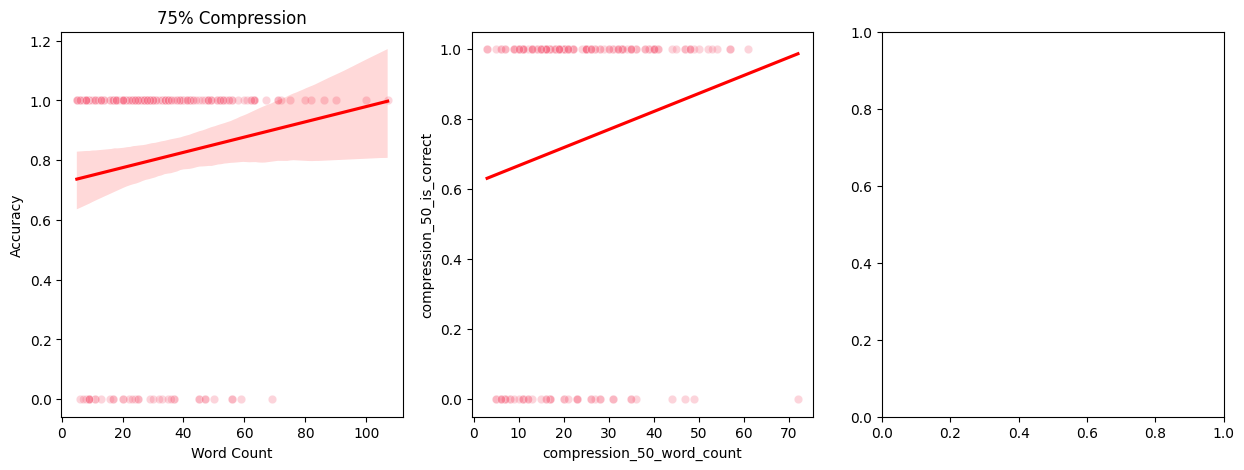

In [17]:
# 1. Select and organize relevant columns
relevant_cols = [
    'Question', 'Correct Answer', 'original_word_count',
    'original_is_correct',
    'compression_75_word_count', 'compression_75_is_correct',
    'compression_50_word_count', 'compression_50_is_correct',
    'compression_25_word_count', 'compression_25_is_correct'
]
analysis_df = df[relevant_cols].copy()

# 2. Calculate accuracy metrics
accuracies = {
    'Original': analysis_df['original_is_correct'].mean(),
    '75% Compression': analysis_df['compression_75_is_correct'].mean(),
    '50% Compression': analysis_df['compression_50_is_correct'].mean(),
    '25% Compression': analysis_df['compression_75_is_correct'].mean()
}

# Print overall accuracies
print("Overall Accuracies:")
for version, acc in accuracies.items():
    print(f"{version}: {acc:.2%}")

# 3. Visualizations

# Figure 1: Accuracy Comparison
plt.figure(figsize=(10, 6))
versions = list(accuracies.keys())
acc_values = list(accuracies.values())
sns.barplot(x=versions, y=acc_values)
plt.title('Model Accuracy Across Compression Levels')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Figure 2: Word Count Distribution
plt.figure(figsize=(12, 6))
word_counts = pd.DataFrame({
    'Original': analysis_df['original_word_count'],
    '75%': analysis_df['compression_75_word_count'],
    '50%': analysis_df['compression_50_word_count'],
    '25%': analysis_df['compression_25_word_count']
})
sns.boxplot(data=word_counts)
plt.title('Word Count Distribution Across Compression Levels')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()

# Figure 3: Accuracy vs Word Count
plt.figure(figsize=(15, 5))

# Create subplots for each compression level
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
compression_levels = [(75, '75%'), (50, '50%'), (25, '25%')]

for i, (level, label) in enumerate(compression_levels):
    word_count_col = f'compression_{level}_word_count'
    is_correct_col = f'compression_{level}_is_correct'
    
    # Calculate accuracy for different word count bins
    bins = pd.qcut(analysis_df[word_count_col], q=10, duplicates='drop')
    accuracy_by_bin = analysis_df.groupby(bins)[is_correct_col].mean()
    
    # Plot
    sns.scatterplot(data=analysis_df, 
                    x=word_count_col, 
                    y=is_correct_col, 
                    alpha=0.3,
                    ax=axes[i])
    
    # Add trend line
    sns.regplot(data=analysis_df, 
                x=word_count_col, 
                y=is_correct_col, 
                scatter=False, 
                color='red',
                ax=axes[i])
    
    axes[i].set_title(f'{label} Compression')
    axes[i].set_xlabel('Word Count')
    axes[i].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Figure 4: Accuracy Change Distribution
plt.figure(figsize=(10, 6))
accuracy_changes = pd.DataFrame({
    '75% vs Original': analysis_df['compression_75_is_correct'] - analysis_df['original_is_correct'],
    '50% vs Original': analysis_df['compression_50_is_correct'] - analysis_df['original_is_correct'],
    '25% vs Original': analysis_df['compression_25_is_correct'] - analysis_df['original_is_correct']
})
sns.violinplot(data=accuracy_changes)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.title('Distribution of Accuracy Changes from Original')
plt.ylabel('Accuracy Change')
plt.tight_layout()
plt.show()

# 4. Statistical Analysis
print("\nDetailed Statistics:")
print("\nWord Count Statistics:")
print(word_counts.describe())

# Calculate correlation between word count and accuracy
correlations = {}
for level, label in compression_levels:
    word_count_col = f'compression_{level}_word_count'
    is_correct_col = f'compression_{level}_is_correct'
    corr = analysis_df[word_count_col].corr(analysis_df[is_correct_col])
    correlations[label] = corr

print("\nCorrelation between Word Count and Accuracy:")
for label, corr in correlations.items():
    print(f"{label}: {corr:.3f}")

# 5. Question-level Analysis
print("\nSample Questions with Different Compression Outcomes:")
interesting_cases = analysis_df[
    (analysis_df['original_is_correct'] != analysis_df['compression_75_is_correct']) |
    (analysis_df['original_is_correct'] != analysis_df['compression_50_is_correct']) |
    (analysis_df['original_is_correct'] != analysis_df['compression_25_is_correct'])
].head(5)

for _, case in interesting_cases.iterrows():
    print("\nOriginal Question:", case['Question'])
    print(f"Original Correct: {case['original_is_correct']}")
    print(f"75% Correct: {case['compression_75_is_correct']}")
    print(f"50% Correct: {case['compression_50_is_correct']}")
    print(f"25% Correct: {case['compression_25_is_correct']}")

In [28]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Load the data
df = pd.read_csv('../datasets/gpqa_diamond_compressed_2.csv')

def display_example(idx=None):
    """
    Display a nicely formatted example with all compressions and their results.
    If idx is None, picks a random example.
    """
    if idx is None:
        idx = np.random.randint(0, len(df))
    
    example = df.iloc[idx]
    
    # Create a formatted string for display
    html_output = f"""
    <div style='background-color: #f5f5f5; padding: 15px; border-radius: 5px;'>
        <h3>Example {idx}</h3>
        
        <div style='margin-bottom: 20px;'>
            <h4>Original Question ({example['original_word_count']} words)</h4>
            <p>{example['Question']}</p>
            <p><strong>Correct Answer:</strong> {example['Correct Answer']}</p>
            <p><strong>Model's Answer:</strong> {example['original_predicted_answer']}</p>
            <p style='color: {"green" if example["original_is_correct"] else "red"}'>
                <strong>Result:</strong> {'✓ Correct' if example["original_is_correct"] else '✗ Incorrect'}
            </p>
        </div>
    """
    
    # Add each compression level
    for level in [75, 50, 25]:
        compressed = example[f'compression_{level}']
        word_count = example[f'compression_{level}_word_count']
        predicted = example[f'compression_{level}_predicted_answer']
        is_correct = example[f'compression_{level}_is_correct']
        
        html_output += f"""
        <div style='margin-bottom: 20px; margin-left: 20px;'>
            <h4>{level}% Compression ({word_count} words)</h4>
            <p>{compressed}</p>
            <p><strong>Model's Answer:</strong> {predicted}</p>
            <p style='color: {"green" if is_correct else "red"}'>
                <strong>Result:</strong> {'✓ Correct' if is_correct else '✗ Incorrect'}
            </p>
        </div>
        """
    
    html_output += "</div>"
    display(HTML(html_output))

# Function to find interesting examples
def find_interesting_examples(n=25):
    """
    Find n interesting examples where compression affects accuracy.
    Returns indices of examples where results differ across compression levels.
    """
    interesting_idx = []
    
    for idx in range(len(df)):
        row = df.iloc[idx]
        results = [
            row['original_is_correct'],
            row['compression_75_is_correct'],
            row['compression_50_is_correct'],
            row['compression_25_is_correct']
        ]
        # Check if results are different across compression levels
        if len(set(results)) > 1:  # If there's more than one unique result
            interesting_idx.append(idx)
            
        if len(interesting_idx) >= n:
            break
    
    return interesting_idx

# Display usage examples
print("1. Display a random example:")
display_example()

print("\n2. Display specific example (e.g., index 0):")
display_example(0)

print("\n3. Display interesting examples where compression affects accuracy:")
interesting_indices = find_interesting_examples(3)
for idx in interesting_indices:
    display_example(idx)

# Summary statistics for the examples
def print_example_stats():
    """Print summary statistics about the examples"""
    print("\nDataset Statistics:")
    print(f"Total examples: {len(df)}")
    
    # Accuracy stats
    accuracies = {
        'Original': df['original_is_correct'].mean() if 'original_is_correct' in df else None,
        '75%': df['compression_75_is_correct'].mean() if 'compression_75_is_correct' in df else None,
        '50%': df['compression_50_is_correct'].mean() if 'compression_50_is_correct' in df else None,
        '25%': df['compression_25_is_correct'].mean() if 'compression_25_is_correct' in df else None
    }
    
    print("\nAccuracy by compression level:")
    for level, acc in accuracies.items():
        if acc is not None:
            print(f"{level}: {acc:.2%}")
    
    # Word count stats
    print("\nWord count statistics:")
    word_counts = {
        'Original': df['original_word_count'].describe(),
        '75%': df['compression_75_word_count'].describe(),
        '50%': df['compression_50_word_count'].describe(),
        '25%': df['compression_25_word_count'].describe()
    }
    
    for level, stats in word_counts.items():
        print(f"\n{level}:")
        print(stats)

print_example_stats()

1. Display a random example:



2. Display specific example (e.g., index 0):



3. Display interesting examples where compression affects accuracy:



Dataset Statistics:
Total examples: 111

Accuracy by compression level:
Original: 79.28%
75%: 77.48%
50%: 63.92%
25%: 70.27%

Word count statistics:

Original:
count    111.000000
mean      68.171171
std       45.943023
min        9.000000
25%       41.000000
50%       56.000000
75%       92.000000
max      283.000000
Name: original_word_count, dtype: float64

75%:
count    111.000000
mean      33.108108
std       19.926388
min        6.000000
25%       18.500000
50%       28.000000
75%       45.000000
max      100.000000
Name: compression_75_word_count, dtype: float64

50%:
count    97.000000
mean     23.690722
std      13.808482
min       5.000000
25%      13.000000
50%      20.000000
75%      32.000000
max      72.000000
Name: compression_50_word_count, dtype: float64

25%:
count    111.000000
mean      13.963964
std        8.094811
min        3.000000
25%        8.500000
50%       12.000000
75%       19.500000
max       43.000000
Name: compression_25_word_count, dtype: float64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate compression ratio by comparing Pre-Revision Question length with Question length
df['original_length'] = df['Pre-Revision Question'].str.len()
df['compressed_length'] = df['Question'].str.len()
df['compression_ratio'] = df['compressed_length'] / df['original_length']

# Create accuracy column (1 if correct, 0 if incorrect)
df['accuracy'] = df['Correct'].astype(int)

# Group by compression ratio ranges and calculate mean accuracy
bins = pd.qcut(df['compression_ratio'], q=4)
accuracy_by_compression = df.groupby(bins)['accuracy'].agg(['mean', 'count']).round(3)

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = accuracy_by_compression['mean'].plot(kind='bar')
plt.title('Accuracy vs Compression Ratio')
plt.xlabel('Compression Ratio Range')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(accuracy_by_compression['mean']):
    ax.text(i, v + 0.01, f'{v:.1%}', ha='center')

# Add sample size annotations
for i, (v, c) in enumerate(zip(accuracy_by_compression['mean'], accuracy_by_compression['count'])):
    ax.text(i, v/2, f'n={c}', ha='center', color='white')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print(accuracy_by_compression)

# Calculate correlation
correlation = df['compression_ratio'].corr(df['accuracy'])
print(f"\nCorrelation between compression ratio and accuracy: {correlation:.3f}")

KeyError: 'Correct'

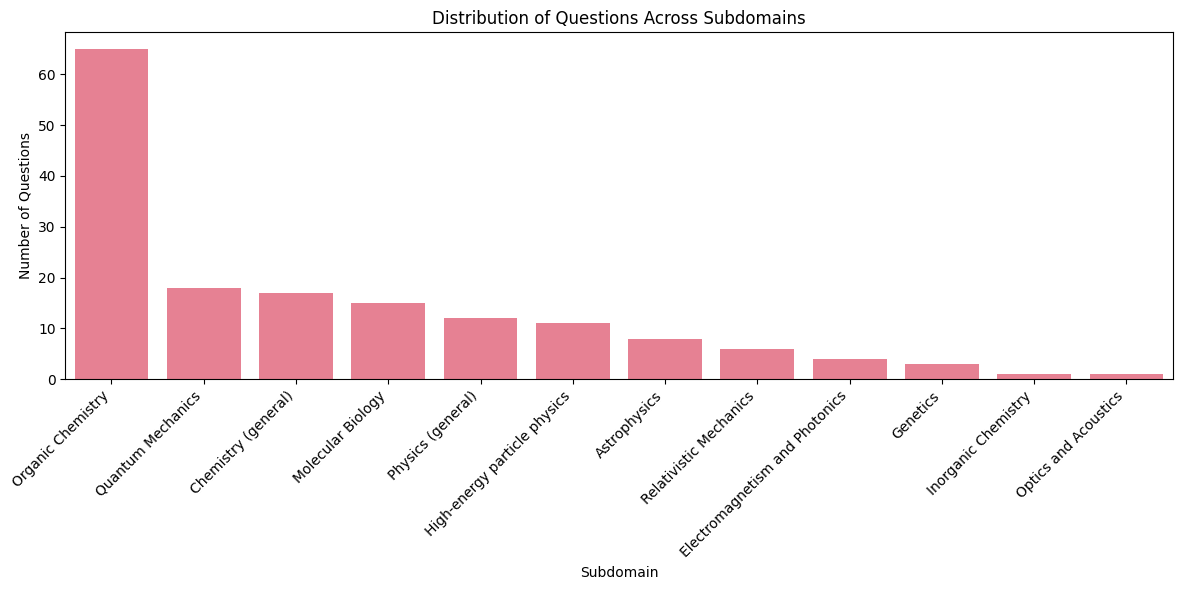

<Figure size 1500x800 with 0 Axes>

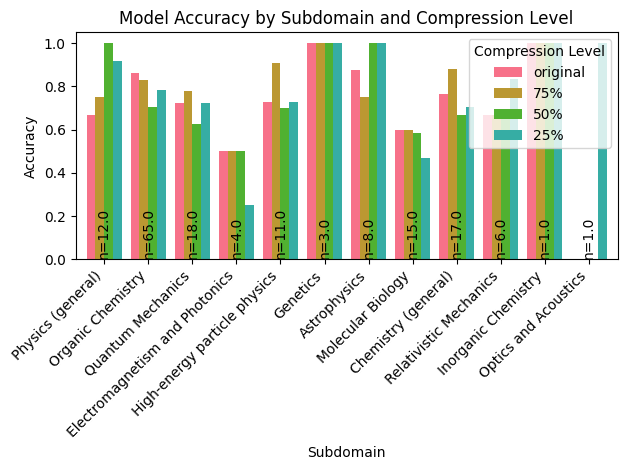

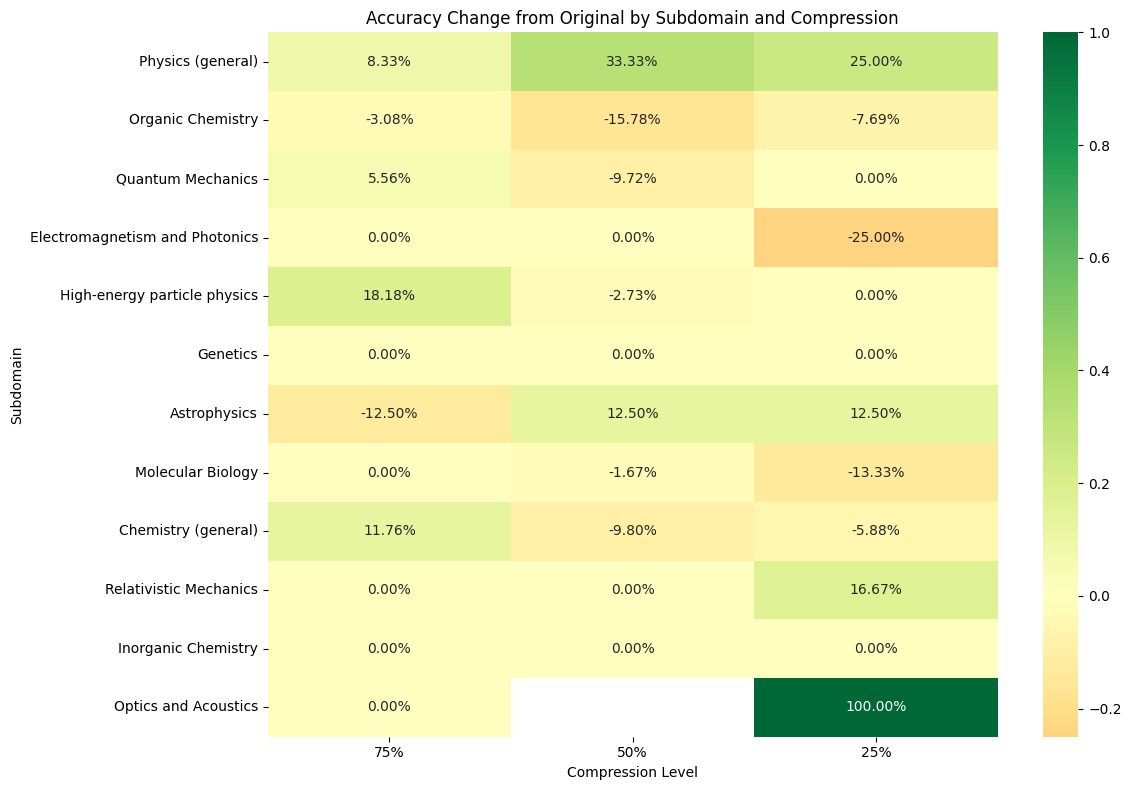

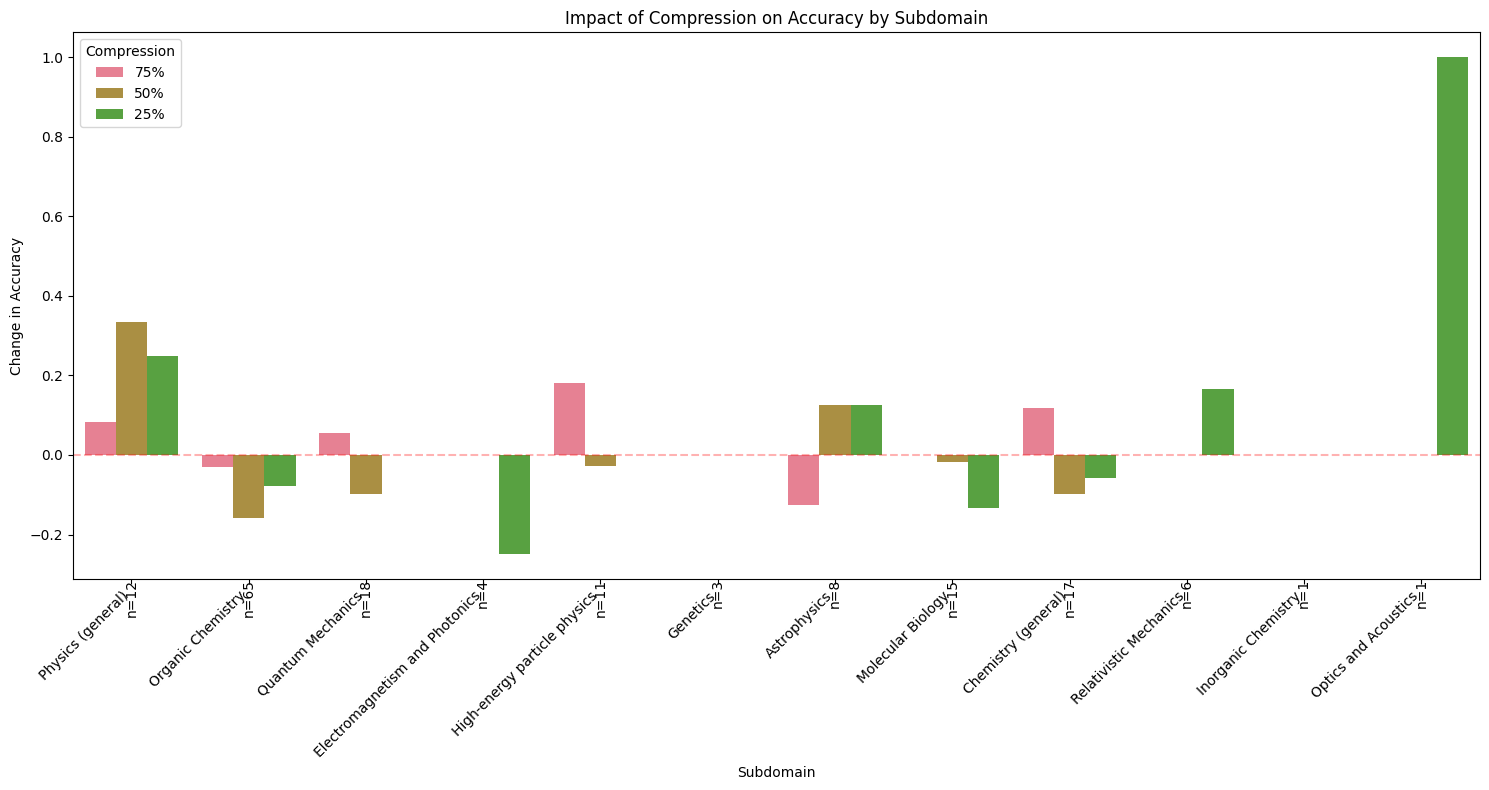


Detailed Subdomain Statistics:

Physics (general):
Number of questions: 12

Accuracy by compression level:
Original: 66.67%
75% compression: 75.00%
50% compression: 100.00%
25% compression: 91.67%

Average word counts:
Original: 70.0
75% compression: 35.2
50% compression: 25.4
25% compression: 16.2

Organic Chemistry:
Number of questions: 65

Accuracy by compression level:
Original: 86.15%
75% compression: 83.08%
50% compression: 70.37%
25% compression: 78.46%

Average word counts:
Original: 53.6
75% compression: 27.9
50% compression: 20.6
25% compression: 11.3

Quantum Mechanics:
Number of questions: 18

Accuracy by compression level:
Original: 72.22%
75% compression: 77.78%
50% compression: 62.50%
25% compression: 72.22%

Average word counts:
Original: 77.9
75% compression: 34.2
50% compression: 25.4
25% compression: 14.4

Electromagnetism and Photonics:
Number of questions: 4

Accuracy by compression level:
Original: 50.00%
75% compression: 50.00%
50% compression: 50.00%
25% compre

AttributeError: module 'numpy' has no attribute 'AxisError'

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('../datasets/gpqa_diamond_compressed_2.csv')

# Calculate accuracy by subdomain and compression level
def calculate_subdomain_metrics():
    metrics = {}
    
    for subdomain in df['Subdomain'].unique():
        subdomain_df = df[df['Subdomain'] == subdomain]
        
        metrics[subdomain] = {
            'original': subdomain_df['original_is_correct'].mean(),
            '75%': subdomain_df['compression_75_is_correct'].mean(),
            '50%': subdomain_df['compression_50_is_correct'].mean(),
            '25%': subdomain_df['compression_25_is_correct'].mean(),
            'count': len(subdomain_df)
        }
    
    return pd.DataFrame(metrics).T


# 1. Subdomain Distribution
plt.figure(figsize=(12, 6))
subdomain_counts = df['Subdomain'].value_counts()
sns.barplot(x=subdomain_counts.index, y=subdomain_counts.values)
plt.title('Distribution of Questions Across Subdomains')
plt.xlabel('Subdomain')
plt.ylabel('Number of Questions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Accuracy by Subdomain and Compression
subdomain_metrics = calculate_subdomain_metrics()

plt.figure(figsize=(15, 8))
accuracy_data = subdomain_metrics[['original', '75%', '50%', '25%']]
ax = accuracy_data.plot(kind='bar', width=0.8)
plt.title('Model Accuracy by Subdomain and Compression Level')
plt.xlabel('Subdomain')
plt.ylabel('Accuracy')
plt.legend(title='Compression Level')
plt.xticks(rotation=45, ha='right')

# Add sample size annotations
for i, subdomain in enumerate(accuracy_data.index):
    count = subdomain_metrics.loc[subdomain, 'count']
    plt.text(i, 0, f'n={count}', ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

# 3. Heatmap of Accuracy Changes
plt.figure(figsize=(12, 8))
accuracy_changes = subdomain_metrics[['75%', '50%', '25%']].subtract(subdomain_metrics['original'], axis=0)
sns.heatmap(accuracy_changes, annot=True, cmap='RdYlGn', center=0, fmt='.2%')
plt.title('Accuracy Change from Original by Subdomain and Compression')
plt.xlabel('Compression Level')
plt.ylabel('Subdomain')
plt.tight_layout()
plt.show()

# 4. Compression Impact Analysis
impact_data = []
for subdomain in df['Subdomain'].unique():
    subdomain_df = df[df['Subdomain'] == subdomain]
    
    # Original accuracy
    base_acc = subdomain_df['original_is_correct'].mean()
    
    for level in [75, 50, 25]:
        comp_acc = subdomain_df[f'compression_{level}_is_correct'].mean()
        impact = comp_acc - base_acc
        impact_data.append({
            'Subdomain': subdomain,
            'Compression': f'{level}%',
            'Impact': impact,
            'Sample_Size': len(subdomain_df)
        })

impact_df = pd.DataFrame(impact_data)

plt.figure(figsize=(15, 8))
sns.barplot(data=impact_df, x='Subdomain', y='Impact', hue='Compression')
plt.title('Impact of Compression on Accuracy by Subdomain')
plt.xlabel('Subdomain')
plt.ylabel('Change in Accuracy')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# Add sample size annotations
for i, subdomain in enumerate(df['Subdomain'].unique()):
    count = df[df['Subdomain'] == subdomain].shape[0]
    plt.text(i, plt.ylim()[0], f'n={count}', ha='center', va='top', rotation=90)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Subdomain Statistics:")
for subdomain in df['Subdomain'].unique():
    print(f"\n{subdomain}:")
    subdomain_df = df[df['Subdomain'] == subdomain]
    print(f"Number of questions: {len(subdomain_df)}")
    
    print("\nAccuracy by compression level:")
    print(f"Original: {subdomain_df['original_is_correct'].mean():.2%}")
    for level in [75, 50, 25]:
        print(f"{level}% compression: {subdomain_df[f'compression_{level}_is_correct'].mean():.2%}")
    
    print("\nAverage word counts:")
    print(f"Original: {subdomain_df['original_word_count'].mean():.1f}")
    for level in [75, 50, 25]:
        print(f"{level}% compression: {subdomain_df[f'compression_{level}_word_count'].mean():.1f}")

# 5. Statistical significance
from scipy import stats

print("\nStatistical Significance Tests:")
for subdomain in df['Subdomain'].unique():
    print(f"\n{subdomain}:")
    subdomain_df = df[df['Subdomain'] == subdomain]
    
    original_acc = subdomain_df['original_is_correct']
    for level in [75, 50, 25]:
        compressed_acc = subdomain_df[f'compression_{level}_is_correct']
        statistic, p_value = stats.wilcoxon(original_acc, compressed_acc)
        print(f"{level}% compression vs original: p-value = {p_value:.4f}")

In [37]:
import pandas as pd
from IPython.display import display, HTML

def view_questions(n=5, start_idx=0):
    """
    Display first N questions with their compressions and results.
    
    Args:
        n: Number of questions to display
        start_idx: Starting index (default 0)
    """
    # Load data
    df = pd.read_csv('../datasets/gpqa_diamond_compressed_2.csv')
    
    # Style for correct/incorrect answers
    correct_style = "color: #1a8754; font-weight: bold"  # Darker green
    incorrect_style = "color: #dc3545; font-weight: bold"  # Darker red
    
    for idx in range(start_idx, min(start_idx + n, len(df))):
        q = df.iloc[idx]
        
        # Calculate compression percentages
        compression_stats = {
            '75%': (q['compression_75_word_count'] / q['original_word_count']) * 100,
            '50%': (q['compression_50_word_count'] / q['original_word_count']) * 100,
            '25%': (q['compression_25_word_count'] / q['original_word_count']) * 100
        }
        
        html = f"""
        <div style="background-color: #ffffff; padding: 20px; margin: 15px; border-radius: 8px; border: 1px solid #dee2e6; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
            <h3 style="color: #2c3e50; border-bottom: 2px solid #3498db; padding-bottom: 8px;">Question {idx + 1}</h3>
            
            <div style="margin: 15px 0; padding: 15px; background-color: #f8f9fa; border-radius: 5px;">
                <h4 style="color: #2c3e50">Original ({q['original_word_count']} words)</h4>
                <p style="color: #2c3e50; font-size: 15px;">{q['Question']}</p>
                <div style="margin: 10px 0; padding: 10px; background-color: #ffffff; border-left: 4px solid #3498db;">
                    <p style="margin: 5px 0;"><b>Correct Answer:</b> {q['Correct Answer']}</p>
                    <p style="margin: 5px 0;"><b>Model's Answer:</b> {q['original_predicted_answer']}</p>
                    <p style="{correct_style if q['original_is_correct'] else incorrect_style}">
                        {'✓ Correct' if q['original_is_correct'] else '✗ Incorrect'}
                    </p>
                </div>
            </div>
            
            <div style="margin: 15px 0; padding: 15px; background-color: #f8f9fa; border-radius: 5px;">
                <h4 style="color: #2c3e50">75% Compression ({q['compression_75_word_count']} words, {compression_stats['75%']:.1f}% of original)</h4>
                <p style="color: #2c3e50; font-size: 15px;">{q['compression_75']}</p>
                <div style="margin: 10px 0; padding: 10px; background-color: #ffffff; border-left: 4px solid #3498db;">
                    <p style="margin: 5px 0;"><b>Model's Answer:</b> {q['compression_75_predicted_answer']}</p>
                    <p style="{correct_style if q['compression_75_is_correct'] else incorrect_style}">
                        {'✓ Correct' if q['compression_75_is_correct'] else '✗ Incorrect'}
                    </p>
                </div>
            </div>
            
            <div style="margin: 15px 0; padding: 15px; background-color: #f8f9fa; border-radius: 5px;">
                <h4 style="color: #2c3e50">50% Compression ({q['compression_50_word_count']} words, {compression_stats['50%']:.1f}% of original)</h4>
                <p style="color: #2c3e50; font-size: 15px;">{q['compression_50']}</p>
                <div style="margin: 10px 0; padding: 10px; background-color: #ffffff; border-left: 4px solid #3498db;">
                    <p style="margin: 5px 0;"><b>Model's Answer:</b> {q['compression_50_predicted_answer']}</p>
                    <p style="{correct_style if q['compression_50_is_correct'] else incorrect_style}">
                        {'✓ Correct' if q['compression_50_is_correct'] else '✗ Incorrect'}
                    </p>
                </div>
            </div>
            
            <div style="margin: 15px 0; padding: 15px; background-color: #f8f9fa; border-radius: 5px;">
                <h4 style="color: #2c3e50">25% Compression ({q['compression_25_word_count']} words, {compression_stats['25%']:.1f}% of original)</h4>
                <p style="color: #2c3e50; font-size: 15px;">{q['compression_25']}</p>
                <div style="margin: 10px 0; padding: 10px; background-color: #ffffff; border-left: 4px solid #3498db;">
                    <p style="margin: 5px 0;"><b>Model's Answer:</b> {q['compression_25_predicted_answer']}</p>
                    <p style="{correct_style if q['compression_25_is_correct'] else incorrect_style}">
                        {'✓ Correct' if q['compression_25_is_correct'] else '✗ Incorrect'}
                    </p>
                </div>
            </div>
        </div>
        """
        display(HTML(html))

# Usage examples:
print("First 3 questions:")
view_questions(100)

print("\nQuestions 10-12:")
view_questions(3, start_idx=10)

First 3 questions:



Questions 10-12:
